#Classificação de imagens de roupas

### Sobre o projeto

* Estudo introdutório sobre Deep Learning, TensorFlow e Keras.

* E-commerce fictício de roupas, as roupas à venda devem ser classificadas em categorias para facilitar as buscas dos clientes no site.

* **Dataset:** [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) que contém pequenas imagens (28x28) de roupas, associadas a 10 classes.

* **Referência:** Estudo desenvolvido acompanhando o curso [Deep Learning parte 1: Keras](https://cursos.alura.com.br/course/deep-learning-introducao-com-keras), da Alura.

# Abertura do dataset e primeiras visualizações

## Fashion MNIST

In [1]:
import tensorflow
from tensorflow import keras

dataset = keras.datasets.fashion_mnist

In [2]:
# retorna duas tuplas com conjuntos de treino, teste, e suas labels
((train_imgs, train_labels),(test_imgs, test_labels)) = dataset.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print(f'Conjunto de treino possui {len(train_imgs)} imagens.')
print(f'Conjunto de teste possui {len(test_imgs)} imagens.')

Conjunto de treino possui 60000 imagens.
Conjunto de teste possui 10000 imagens.


In [4]:
print(train_imgs.shape)
print(test_imgs.shape)

(60000, 28, 28)
(10000, 28, 28)


## Classes

In [11]:
import numpy as np
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

* Os nomes das classes estão no Readme do dataset.

In [16]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Visualização de alguns itens

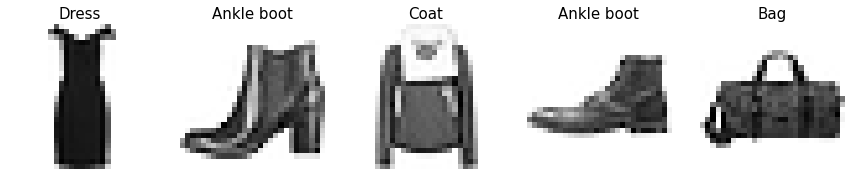

In [20]:
import random
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'Greys'

fig, axs = plt.subplots(1, 5, figsize = (15, 25))

rand_ids = [random.randint(0, 60000) for i in range(5)]

for k, i in zip(range(0,5), rand_ids):
  axs[k].imshow(train_imgs[i])
  axs[k].axis('off')
  axs[k].set_title(class_name[train_labels[i]], fontsize = 15)

plt.show()

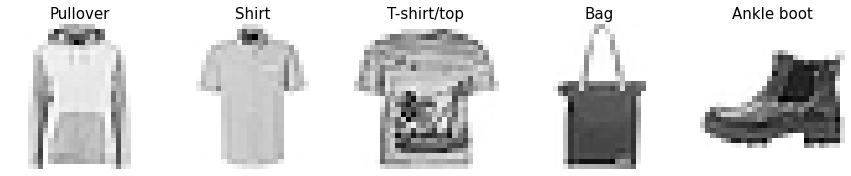

In [21]:
fig, axs = plt.subplots(1, 5, figsize = (15, 25))

rand_ids = [random.randint(0, 10000) for i in range(5)]

for k, i in zip(range(0,5), rand_ids):
  axs[k].imshow(test_imgs[i])
  axs[k].axis('off')
  axs[k].set_title(class_name[test_labels[i]], fontsize = 15)

plt.show()

# Funções de Ativação

![teste](https://miro.medium.com/max/720/1*ZafDv3VUm60Eh10OeJu1vw.webp)

## ReLu

* Todos os número negativos se tornam 0.
* A ReLu tem a possibilidade de desligar alguns neurônios.
* $a = z^+ = max(0, z)$
* É não-linear, essencial para separar mais de duas características em uma única função.

## SoftMax

* Usada da última camada.
* Atribui probabilidades de cada categoria estar correta.

* ### $a_j^{(L-1)} = \frac{exp(z_j^{(L-1)})}{∑_i exp(z_i^{(L-1)})}$

  * (L-1) ⟶ camada anterior.
  * a > 0, por do exponencial.
  * O somatório de todas as probabilidades é 1, 100%.

# Construção do Modelo

* Modelo >> entrada > processamento > saída

* Na primeira camada, Camada 0, a imagem será "achatada" para um array de pixels de uma única dimensão.

* Na Camda 1, é feita a comunicação com a camada de entrada. Neste caso, será uma camada densa, totalmente conectada com a anterior, de entrada.
  * No primneiro parâmetro, são definidos quantos neurônios estarão nesta camada.É interessante utilizar múltiplos de 2 por questão de processamento.
  * Deve ser definida também a função de ativação, que neste caso será a ReLu (https://www.tensorflow.org/api_docs/python/tf/nn/relu).

* Na Camada 2, de saída, terá o número de classificações do dataset e totalmente conectada.

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),               # camada 0, entrada
    keras.layers.Dense(256, activation = tensorflow.nn.relu),   # camada 1, escondida
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)  # camada 2, saída
])